<a href="https://colab.research.google.com/github/dsrojo10/ML/blob/main/3_PersonalProjects_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. **Segmentación de Clientes**

### Descripción:

Usa algoritmos de clustering como K-means para segmentar clientes basándote en su comportamiento de compra. Este proyecto te ayudará a entender cómo agrupar clientes con características similares para estrategias de marketing dirigidas.

### Requisitos:

- **Herramientas:** Python, Scikit-learn, pandas, Matplotlib, seaborn.
- **Habilidades:** Preprocesamiento de datos, ingeniería de características, clustering, visualización de datos.
- **Dataset:** "Mall Customer Segmentation Data" de Kaggle.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

100%|██████████| 1.55k/1.55k [00:00<00:00, 913kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [ ]:
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

# List files in the directory to find the CSV file
files = os.listdir(path)
print("Files in directory:", files)

# Assuming 'Mall_Customers.csv' is the file we want to read
csv_file_path = os.path.join(path, 'Mall_Customers.csv')
data = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print(data.head())

Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1
Files in directory: ['Mall_Customers.csv']
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 1. Análisis Exploratorio de Datos (EDA):

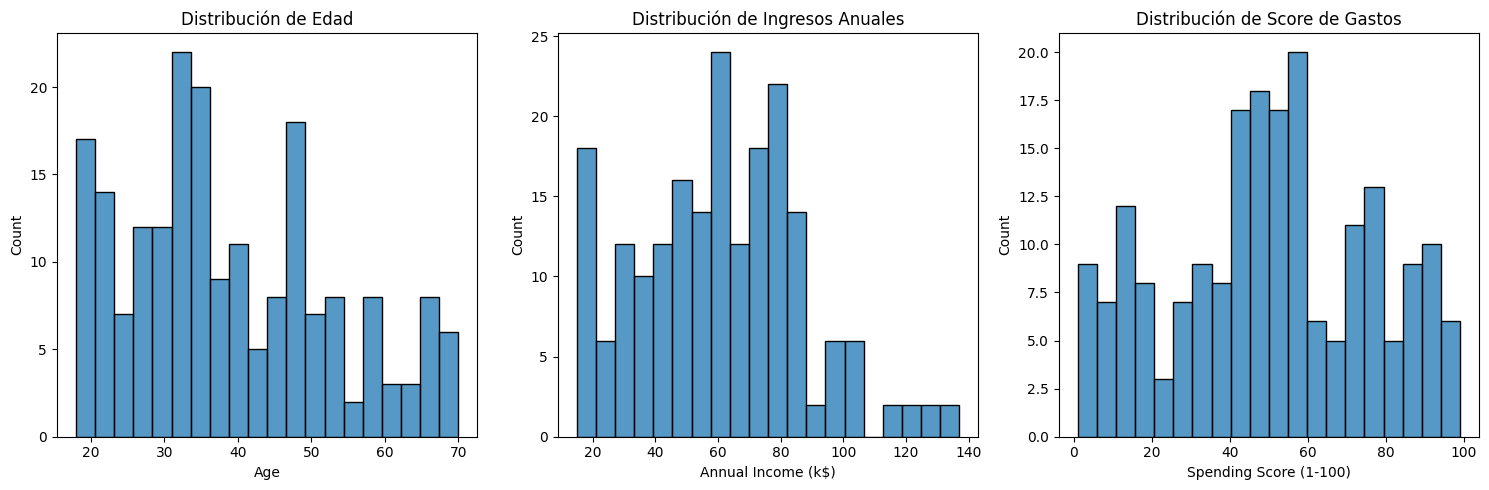

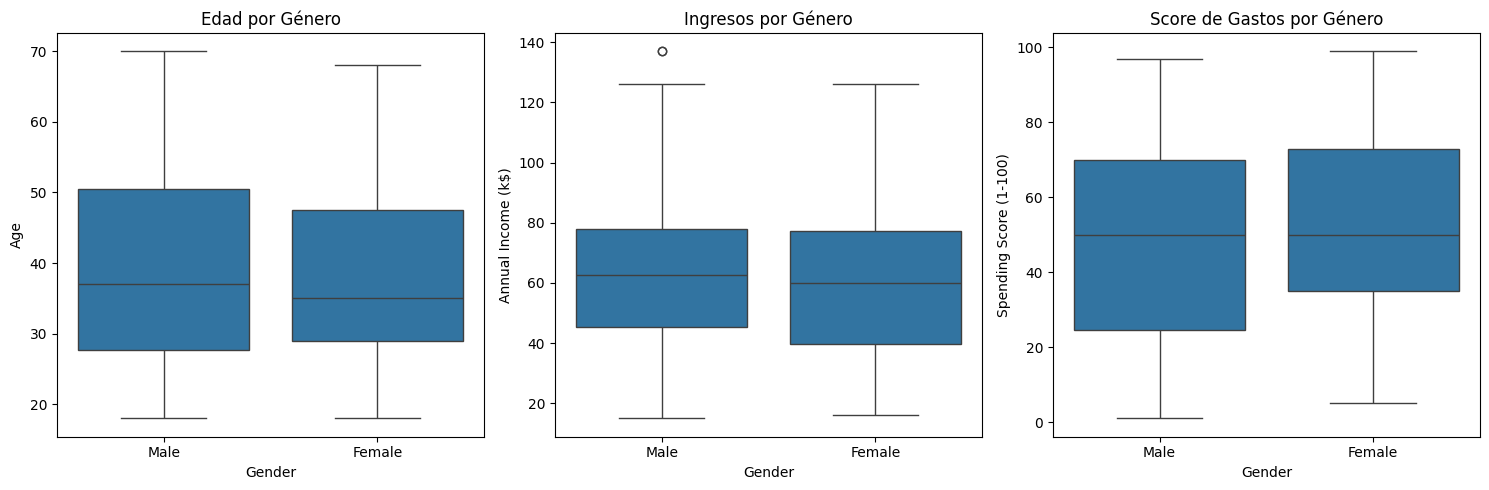

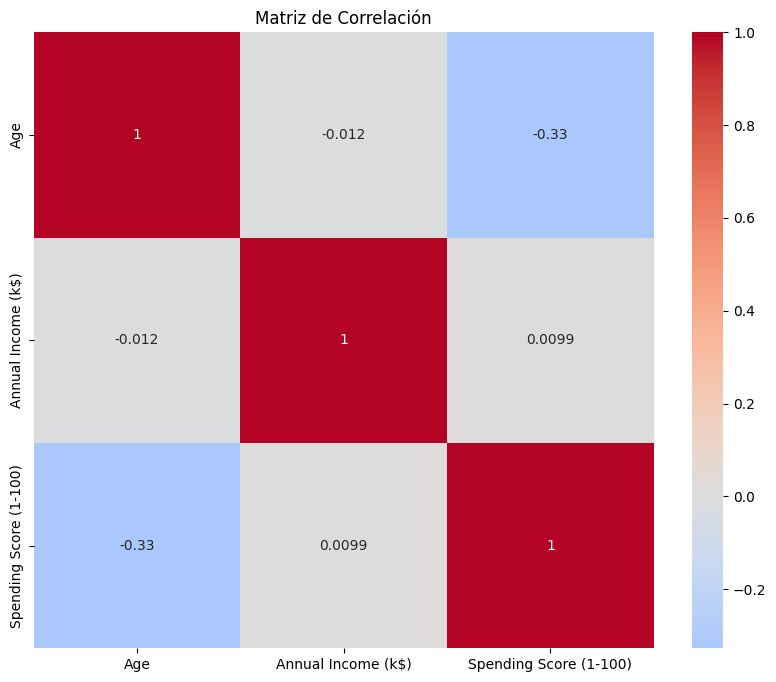

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

df = data.copy()

# Visualización de distribuciones
plt.figure(figsize=(15, 5))

# Distribución de Edad
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Age', bins=20)
plt.title('Distribución de Edad')

# Distribución de Ingresos Anuales
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Annual Income (k$)', bins=20)
plt.title('Distribución de Ingresos Anuales')

# Distribución de Score de Gastos
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Spending Score (1-100)', bins=20)
plt.title('Distribución de Score de Gastos')

plt.tight_layout()
plt.show()

# Análisis por género
plt.figure(figsize=(15, 5))

# Box plot de Edad por Género
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Gender', y='Age')
plt.title('Edad por Género')

# Box plot de Ingresos por Género
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)')
plt.title('Ingresos por Género')

# Box plot de Score de Gastos por Género
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.title('Score de Gastos por Género')

plt.tight_layout()
plt.show()

# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

### 2. Preparación de datos para clustering:

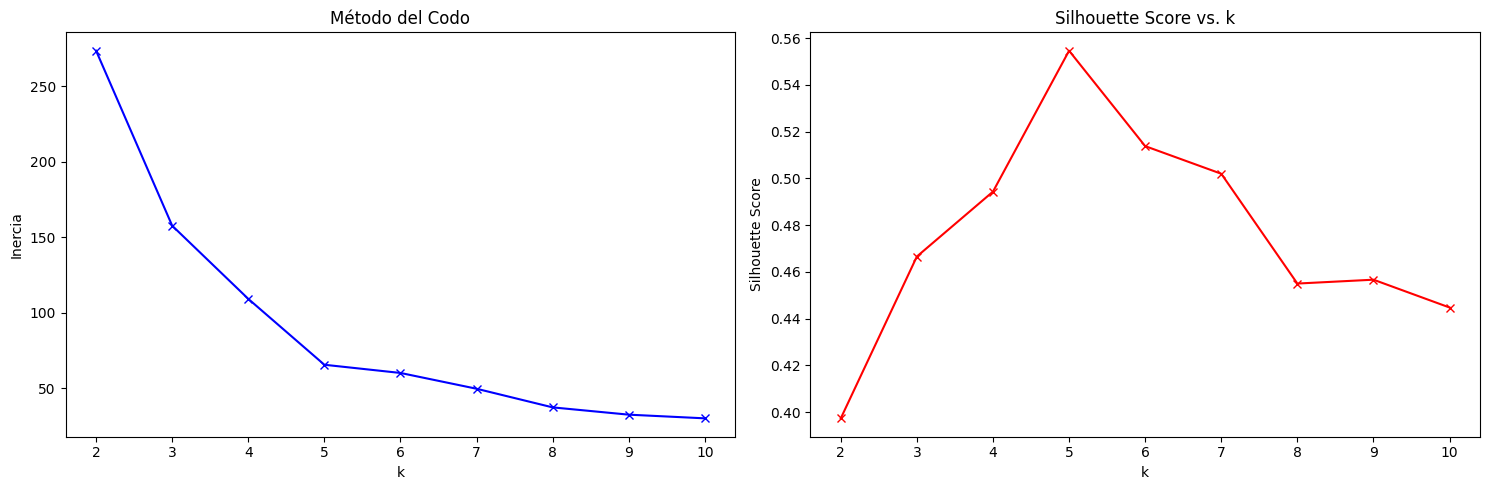

In [ ]:
# Seleccionar características para clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar el número óptimo de clusters usando el método del codo
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualizar el método del codo
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.title('Método del Codo')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')

plt.tight_layout()
plt.show()

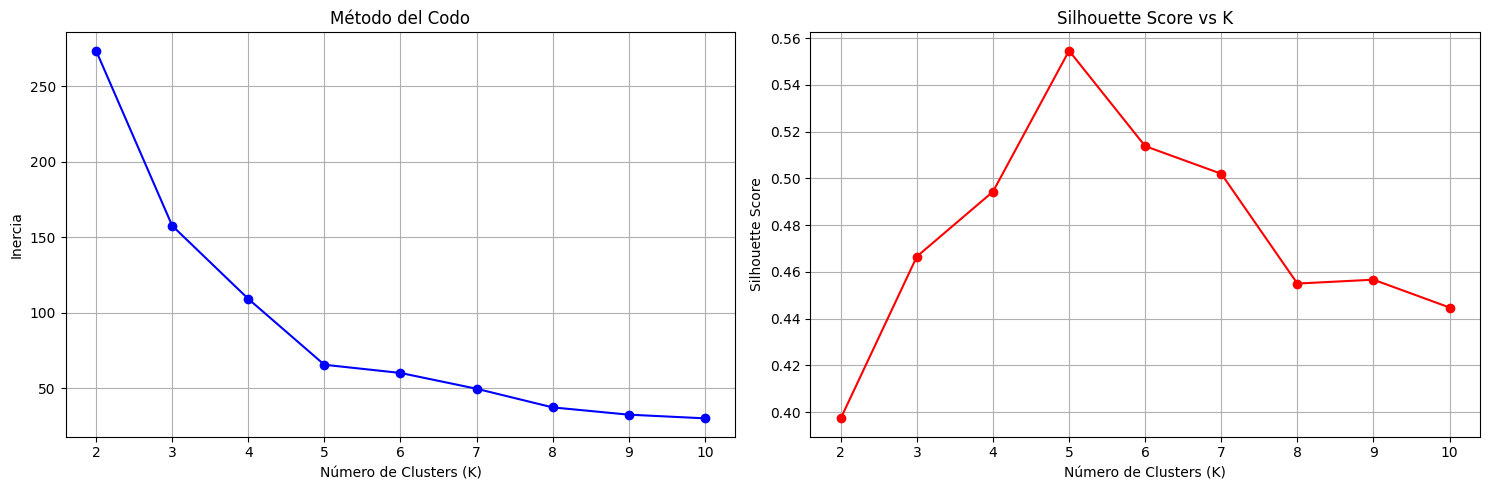

In [ ]:
# Visualización conjunta para justificar la elección
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Método del codo
ax1.plot(K, inertias, 'bo-')
ax1.set_xlabel('Número de Clusters (K)')
ax1.set_ylabel('Inercia')
ax1.set_title('Método del Codo')
ax1.grid(True)

# Silhouette Score
ax2.plot(K, silhouette_scores, 'ro-')
ax2.set_xlabel('Número de Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs K')
ax2.grid(True)

plt.tight_layout()
plt.show()

El Método del Codo (Elbow Method):
- Es una técnica para determinar el número óptimo de clusters (K) en K-means
- Funciona calculando la suma de las distancias al cuadrado entre los puntos y sus centroides (inercia) para diferentes valores de K
- Se grafica K vs Inercia, y el "codo" de la curva (donde la inercia comienza a disminuir más lentamente) sugiere el K óptimo
- Es como doblar un brazo: el codo marca el punto donde añadir más clusters no aporta tanto beneficio

### 3. Implementación del clustering:

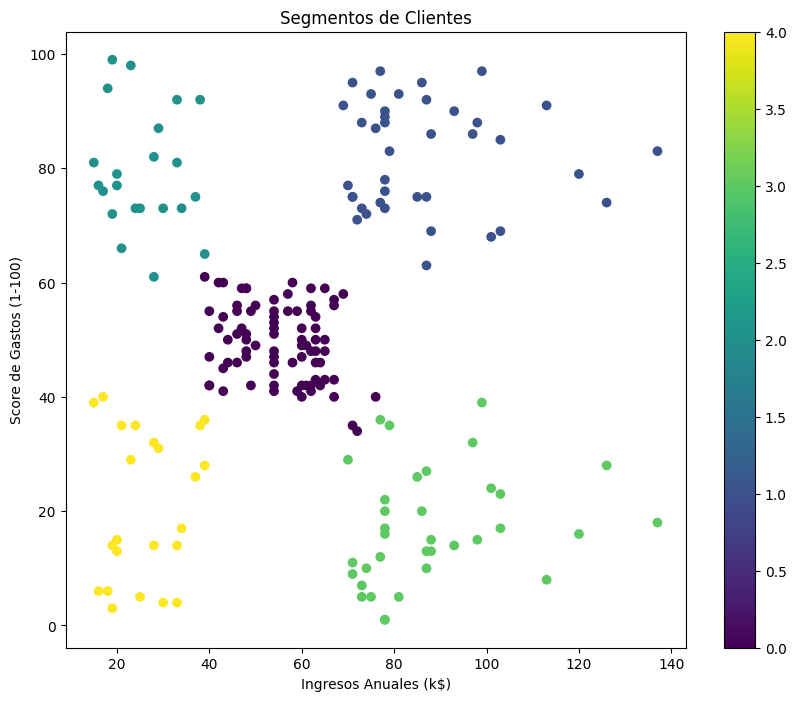


Análisis de Clusters:

Cluster 0:
Número de clientes: 81

Promedios:
Edad: 42.72
Ingresos Anuales: $55.30k
Score de Gastos: 49.52
Distribución de Género: 
Gender
Female    48
Male      33
Name: count, dtype: int64

Cluster 1:
Número de clientes: 39

Promedios:
Edad: 32.69
Ingresos Anuales: $86.54k
Score de Gastos: 82.13
Distribución de Género: 
Gender
Female    21
Male      18
Name: count, dtype: int64

Cluster 2:
Número de clientes: 22

Promedios:
Edad: 25.27
Ingresos Anuales: $25.73k
Score de Gastos: 79.36
Distribución de Género: 
Gender
Female    13
Male       9
Name: count, dtype: int64

Cluster 3:
Número de clientes: 35

Promedios:
Edad: 41.11
Ingresos Anuales: $88.20k
Score de Gastos: 17.11
Distribución de Género: 
Gender
Male      19
Female    16
Name: count, dtype: int64

Cluster 4:
Número de clientes: 23

Promedios:
Edad: 45.22
Ingresos Anuales: $26.30k
Score de Gastos: 20.91
Distribución de Género: 
Gender
Female    14
Male       9
Name: count, dtype: int64


In [ ]:
# Aplicar K-means con el número óptimo de clusters (5 clusters basado en el análisis anterior)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añadir las etiquetas al DataFrame original
df['Cluster'] = clusters

# Visualización de clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['Cluster'], cmap='viridis')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Score de Gastos (1-100)')
plt.title('Segmentos de Clientes')
plt.colorbar(scatter)
plt.show()

# Análisis de clusters
print("\nAnálisis de Clusters:")
for cluster in range(5):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Número de clientes: {len(cluster_data)}")
    print("\nPromedios:")
    print(f"Edad: {cluster_data['Age'].mean():.2f}")
    print(f"Ingresos Anuales: ${cluster_data['Annual Income (k$)'].mean():.2f}k")
    print(f"Score de Gastos: {cluster_data['Spending Score (1-100)'].mean():.2f}")
    print(f"Distribución de Género: \n{cluster_data['Gender'].value_counts()}")

### 4. Análisis adicional por edad:

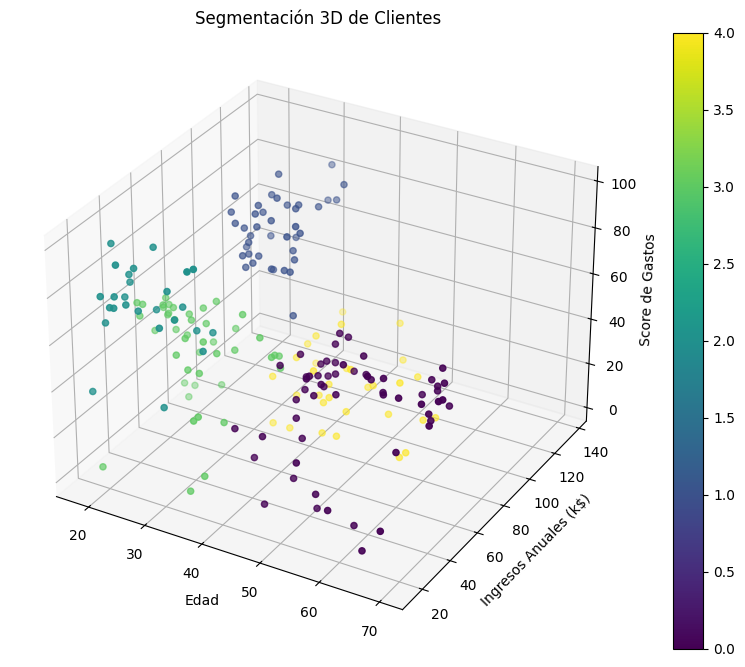

In [ ]:
# Clustering considerando la edad
X_with_age = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
X_with_age_scaled = StandardScaler().fit_transform(X_with_age)

kmeans_3d = KMeans(n_clusters=5, random_state=42)
clusters_3d = kmeans_3d.fit_predict(X_with_age_scaled)

# Visualización 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'],
                    df['Spending Score (1-100)'], c=clusters_3d, cmap='viridis')
ax.set_xlabel('Edad')
ax.set_ylabel('Ingresos Anuales (k$)')
ax.set_zlabel('Score de Gastos')
plt.colorbar(scatter)
plt.title('Segmentación 3D de Clientes')
plt.show()

Vistas en diferentes angulos:

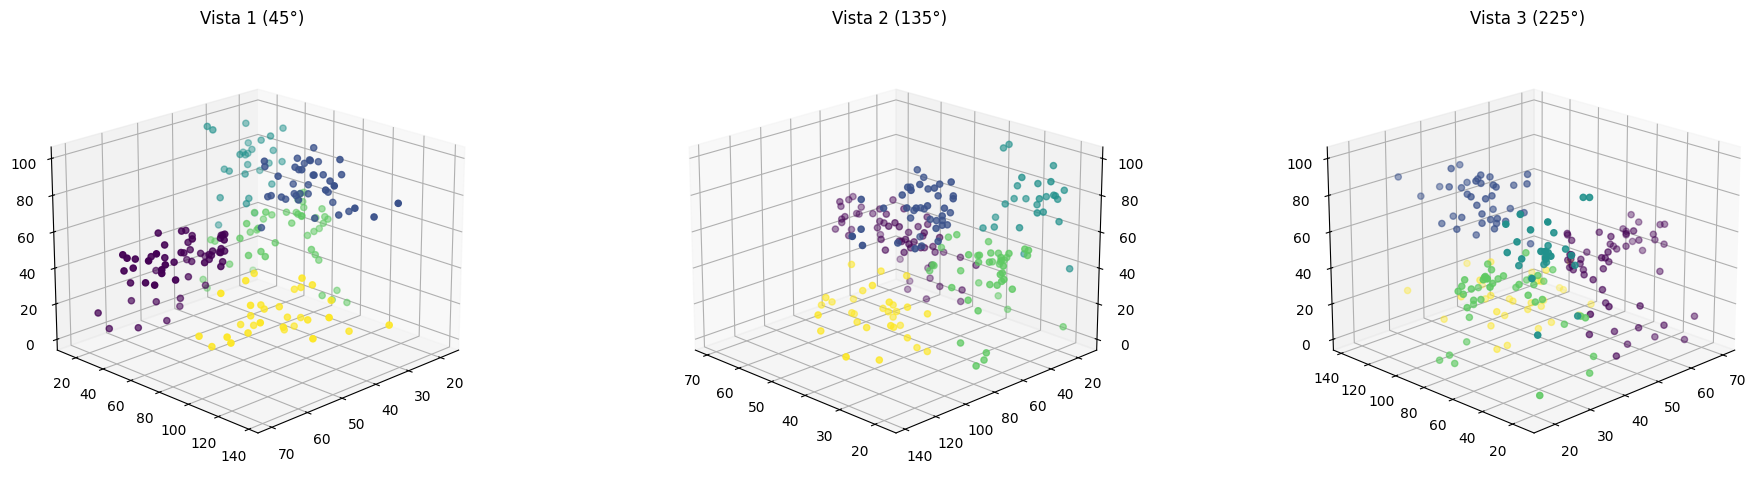

In [ ]:
# Múltiples vistas del gráfico 3D
fig = plt.figure(figsize=(20, 5))

# Vista 1
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(df['Age'], df['Annual Income (k$)'],
                      df['Spending Score (1-100)'], c=clusters_3d, cmap='viridis')
ax1.view_init(elev=20, azim=45)
ax1.set_title('Vista 1 (45°)')

# Vista 2
ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(df['Age'], df['Annual Income (k$)'],
                      df['Spending Score (1-100)'], c=clusters_3d, cmap='viridis')
ax2.view_init(elev=20, azim=135)
ax2.set_title('Vista 2 (135°)')

# Vista 3
ax3 = fig.add_subplot(133, projection='3d')
scatter3 = ax3.scatter(df['Age'], df['Annual Income (k$)'],
                      df['Spending Score (1-100)'], c=clusters_3d, cmap='viridis')
ax3.view_init(elev=20, azim=225)
ax3.set_title('Vista 3 (225°)')

plt.tight_layout()
plt.show()

### 5. Análisis de perfiles de cliente:


Perfiles de Cliente:
           Age         Annual Income (k$)          Spending Score (1-100)      \
          mean min max               mean min  max                   mean min   
Cluster                                                                         
0        42.72  18  70              55.30  39   76                  49.52  34   
1        32.69  27  40              86.54  69  137                  82.13  63   
2        25.27  18  35              25.73  15   39                  79.36  61   
3        41.11  19  59              88.20  70  137                  17.11   1   
4        45.22  19  67              26.30  15   39                  20.91   3   

                                 Gender  
        max                    <lambda>  
Cluster                                  
0        61  {'Female': 48, 'Male': 33}  
1        97  {'Female': 21, 'Male': 18}  
2        99   {'Female': 13, 'Male': 9}  
3        39  {'Male': 19, 'Female': 16}  
4        40   {'Female': 14, 'Male'

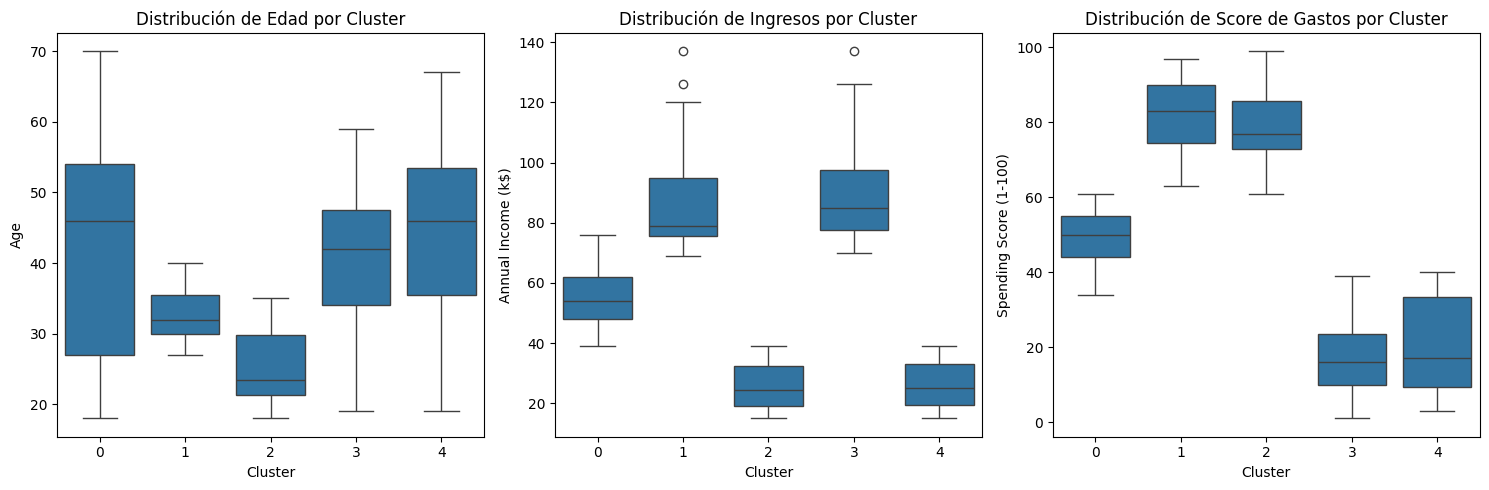

In [ ]:
# Crear perfiles de cliente basados en los clusters
profiles = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'Gender': lambda x: x.value_counts().to_dict()
}).round(2)

print("\nPerfiles de Cliente:")
print(profiles)

# Visualización de características por cluster
plt.figure(figsize=(15, 5))

# Box plots para cada característica por cluster
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Cluster', y='Age')
plt.title('Distribución de Edad por Cluster')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)')
plt.title('Distribución de Ingresos por Cluster')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)')
plt.title('Distribución de Score de Gastos por Cluster')

plt.tight_layout()
plt.show()

### Análisis de outliers:

In [ ]:
# Detección de outliers usando IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    return outliers

# Detectar outliers en cada característica numérica
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for column in numeric_columns:
    outliers = detect_outliers(df, column)
    print(f"\nOutliers en {column}:")
    print(outliers)


Outliers en Age:
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100), Cluster]
Index: []

Outliers en Annual Income (k$):
     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
198         199   Male   32                 137                      18   
199         200   Male   30                 137                      83   

     Cluster  
198        3  
199        1  

Outliers en Spending Score (1-100):
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100), Cluster]
Index: []


### 6. Análisis de segmentos específicos:

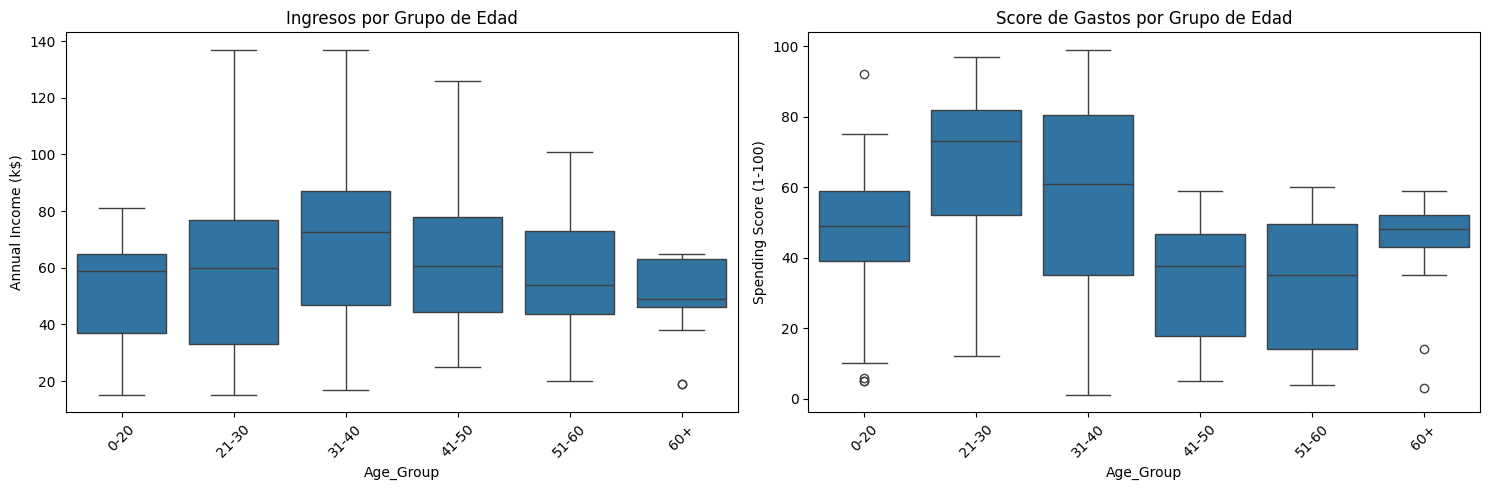

In [ ]:
# Análisis por grupos de edad
df['Age_Group'] = pd.cut(df['Age'],
                        bins=[0, 20, 30, 40, 50, 60, 100],
                        labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

# Análisis de gastos e ingresos por grupo de edad
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Age_Group', y='Annual Income (k$)')
plt.title('Ingresos por Grupo de Edad')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Age_Group', y='Spending Score (1-100)')
plt.title('Score de Gastos por Grupo de Edad')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 7. Validación del modelo:

In [ ]:
# Validación del clustering usando métricas adicionales
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

print("\nMétricas de validación del clustering:")
print(f"Davies Bouldin Score: {davies_bouldin_score(X_scaled, clusters):.3f}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(X_scaled, clusters):.3f}")


Métricas de validación del clustering:
Davies Bouldin Score: 0.572
Calinski Harabasz Score: 248.649


* Davies Bouldin Score (0.572):

  - Mide la similitud promedio entre cada cluster y su cluster más similar
  - Rango: 0 a infinito
  - Valores más bajos son mejores
  - 0.572 es un buen valor, indica que los clusters están bien separados

* Calinski Harabasz Score (248.649):
  - Mide la ratio entre la dispersión dentro de los clusters y entre clusters
  - Valores más altos son mejores
  - 248.649 es un valor alto, sugiriendo una buena separación entre clusters

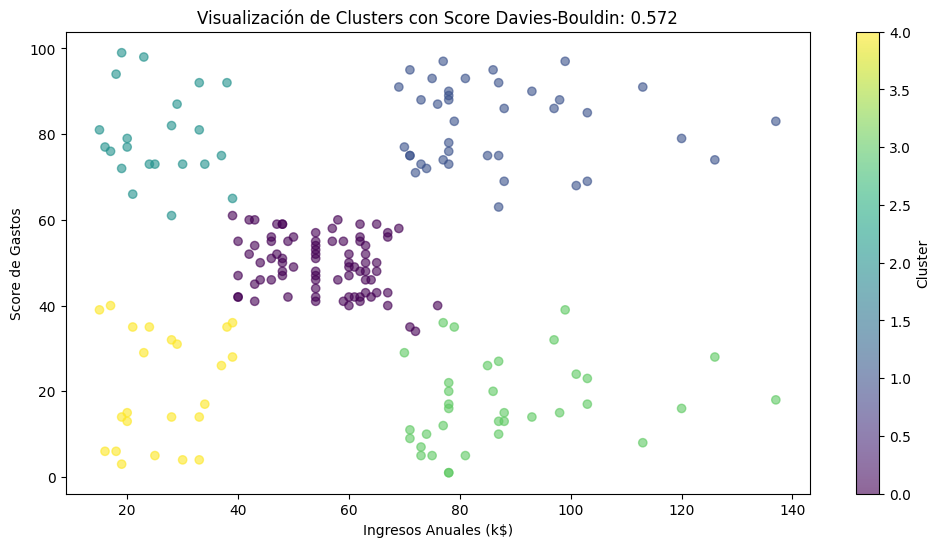

In [ ]:
# Visualización de la calidad de los clusters
plt.figure(figsize=(12, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Score de Gastos')
plt.title('Visualización de Clusters con Score Davies-Bouldin: 0.572')
plt.show()

# Predicciones (adicional):

### Predicción de Cluster para Nuevos Clientes

In [ ]:
# Crear un modelo predictivo para asignar clusters a nuevos clientes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Preparar los datos
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Cluster']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluar el modelo
y_pred = rf_classifier.predict(X_test)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Ejemplo de predicción para un nuevo cliente
nuevo_cliente = np.array([[35, 60, 50]])  # Age, Income, Spending Score
cluster_predicho = rf_classifier.predict(nuevo_cliente)
print(f"\nCluster predicho para nuevo cliente: {cluster_predicho[0]}")

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       0.91      0.91      0.91        11
           4       1.00      1.00      1.00         3

    accuracy                           0.95        40
   macro avg       0.97      0.97      0.97        40
weighted avg       0.95      0.95      0.95        40


Cluster predicho para nuevo cliente: 0


In [ ]:
# Ejemplo de predicción para un nuevo cliente
nuevo_cliente = np.array([[20, 50, 60]])  # Age, Income, Spending Score
cluster_predicho = rf_classifier.predict(nuevo_cliente)
print(f"\nCluster predicho para nuevo cliente: {cluster_predicho[0]}")


Cluster predicho para nuevo cliente: 0


### Análisis de Probabilidad de Pertenencia a Clusters

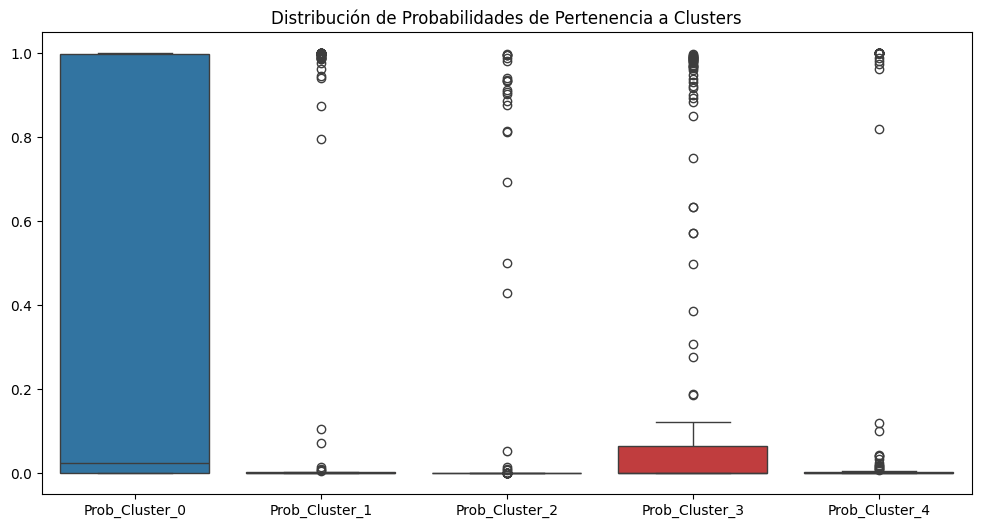

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Preparar datos
X_gmm = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled_gmm = scaler.fit_transform(X_gmm)

# Ajustar modelo GMM
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_scaled_gmm)

# Obtener probabilidades
probs = gmm.predict_proba(X_scaled_gmm)

# Añadir probabilidades al DataFrame
for i in range(5):
    df[f'Prob_Cluster_{i}'] = probs[:, i]

# Visualizar distribución de probabilidades
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[[f'Prob_Cluster_{i}' for i in range(5)]])
plt.title('Distribución de Probabilidades de Pertenencia a Clusters')
plt.show()

Ejemplo de probabilidades para 5 clientes:

Cada fila muestra la probabilidad de que el cliente pertenezca a cada cluster
Las probabilidades suman 1 para cada cliente

CustomerID | Cluster | Prob_C0 | Prob_C1 | Prob_C2 | Prob_C3 | Prob_C4
---------------------------------------------------------------------------
        1 |       2 |    0.07 |    0.00 |    0.93 |    0.00 |    0.00
        2 |       2 |    0.00 |    0.00 |    0.99 |    0.01 |    0.00
        3 |       0 |    1.00 |    0.00 |    0.00 |    0.00 |    0.00
        4 |       2 |    0.00 |    0.00 |    0.99 |    0.01 |    0.00
        5 |       0 |    0.98 |    0.00 |    0.02 |    0.00 |    0.00

Número de clientes con alta incertidumbre (prob_max < 0.7): 7


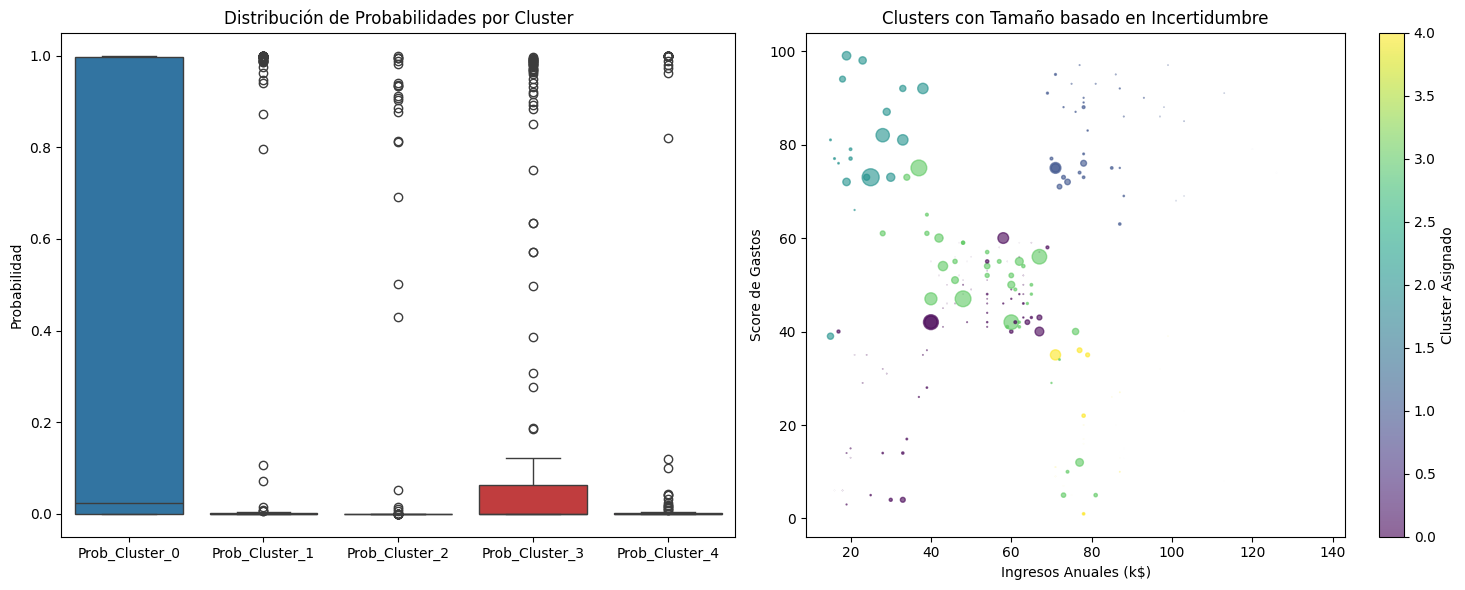


Ejemplos de clientes con alta incertidumbre:

CustomerID | Cluster | Prob_C0 | Prob_C1 | Prob_C2 | Prob_C3 | Prob_C4
---------------------------------------------------------------------------
       24 |       2 |    0.00 |    0.00 |    0.50 |    0.50 |    0.00
       26 |       2 |    0.00 |    0.00 |    0.69 |    0.31 |    0.00
       40 |       3 |    0.00 |    0.00 |    0.43 |    0.57 |    0.00
       49 |       0 |    0.61 |    0.00 |    0.00 |    0.39 |    0.00
       70 |       3 |    0.43 |    0.00 |    0.00 |    0.57 |    0.00


In [ ]:
# Ajustar GMM
X_gmm = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled_gmm = scaler.fit_transform(X_gmm)

gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_scaled_gmm)

# Obtener probabilidades
probs = gmm.predict_proba(X_scaled_gmm)

# Crear un DataFrame con las probabilidades
prob_df = pd.DataFrame(probs,
                      columns=[f'Prob_Cluster_{i}' for i in range(5)])

# Añadir información del cliente
prob_df['CustomerID'] = df['CustomerID'].astype(int)  # Convertir a int
prob_df['Assigned_Cluster'] = gmm.predict(X_scaled_gmm).astype(int)  # Convertir a int

# Mostrar ejemplos de clientes
print("Ejemplo de probabilidades para 5 clientes:")
print("\nCada fila muestra la probabilidad de que el cliente pertenezca a cada cluster")
print("Las probabilidades suman 1 para cada cliente")
print("\nCustomerID | Cluster | Prob_C0 | Prob_C1 | Prob_C2 | Prob_C3 | Prob_C4")
print("-" * 75)

for i in range(5):
    customer = prob_df.iloc[i]
    print(f"{int(customer['CustomerID']):9d} | {int(customer['Assigned_Cluster']):7d} | "
          f"{customer['Prob_Cluster_0']:7.2f} | {customer['Prob_Cluster_1']:7.2f} | "
          f"{customer['Prob_Cluster_2']:7.2f} | {customer['Prob_Cluster_3']:7.2f} | "
          f"{customer['Prob_Cluster_4']:7.2f}")

# Visualizar la distribución de probabilidades para cada cluster
plt.figure(figsize=(15, 6))

# Gráfico de boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=prob_df[[f'Prob_Cluster_{i}' for i in range(5)]])
plt.title('Distribución de Probabilidades por Cluster')
plt.ylabel('Probabilidad')

# Identificar clientes con alta incertidumbre
high_uncertainty = prob_df[prob_df[[f'Prob_Cluster_{i}' for i in range(5)]].max(axis=1) < 0.7]
print(f"\nNúmero de clientes con alta incertidumbre (prob_max < 0.7): {len(high_uncertainty)}")

# Scatter plot con tamaño basado en la incertidumbre
plt.subplot(1, 2, 2)
max_probs = prob_df[[f'Prob_Cluster_{i}' for i in range(5)]].max(axis=1)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c=prob_df['Assigned_Cluster'],
           s=300 * (1 - max_probs),  # puntos más grandes para mayor incertidumbre
           alpha=0.6)
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Score de Gastos')
plt.title('Clusters con Tamaño basado en Incertidumbre')
plt.colorbar(label='Cluster Asignado')
plt.tight_layout()
plt.show()

# Mostrar algunos ejemplos de clientes con alta incertidumbre
if len(high_uncertainty) > 0:
    print("\nEjemplos de clientes con alta incertidumbre:")
    print("\nCustomerID | Cluster | Prob_C0 | Prob_C1 | Prob_C2 | Prob_C3 | Prob_C4")
    print("-" * 75)

    for i in range(min(5, len(high_uncertainty))):
        customer = high_uncertainty.iloc[i]
        print(f"{int(customer['CustomerID']):9d} | {int(customer['Assigned_Cluster']):7d} | "
              f"{customer['Prob_Cluster_0']:7.2f} | {customer['Prob_Cluster_1']:7.2f} | "
              f"{customer['Prob_Cluster_2']:7.2f} | {customer['Prob_Cluster_3']:7.2f} | "
              f"{customer['Prob_Cluster_4']:7.2f}")

### Detección de Anomalías


Clientes identificados como anomalías:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
2             3  Female   20                  16                       6   
8             9    Male   64                  19                       3   
10           11    Male   67                  19                      14   
11           12  Female   35                  19                      99   
12           13  Female   58                  20                      15   
22           23  Female   46                  25                       5   
30           31    Male   60                  30                       4   
32           33    Male   53                  33                       4   
33           34    Male   18                  33                      92   
40           41  Female   65                  38                      35   
162         163    Male   19                  81

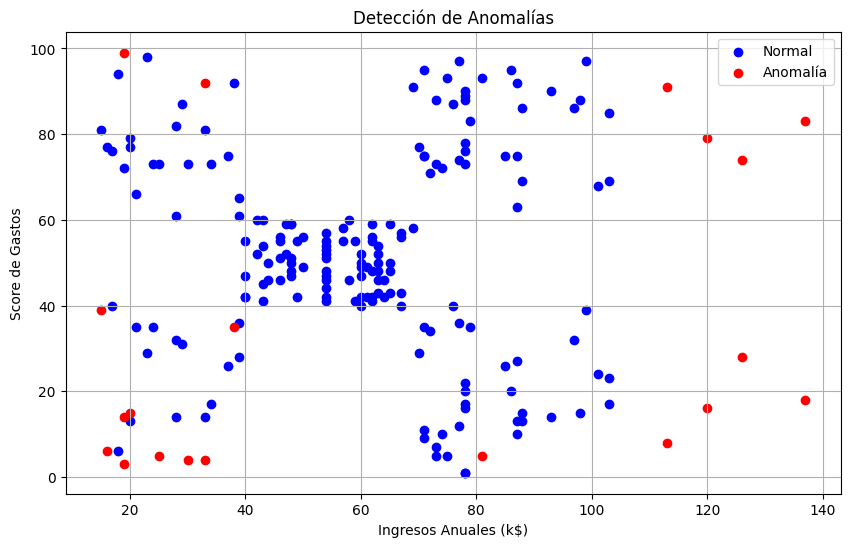

In [ ]:
from sklearn.ensemble import IsolationForest

# Preparar datos
X_anomaly = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled_anomaly = scaler.fit_transform(X_anomaly)

# Entrenar detector de anomalías
iso_forest = IsolationForest(contamination=0.1, random_state=42)
anomalies = iso_forest.fit_predict(X_scaled_anomaly)

# Añadir resultados al DataFrame
df['Is_Anomaly'] = anomalies
print("\nClientes identificados como anomalías:")
print(df[df['Is_Anomaly'] == -1])

# Visualizar anomalías
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Is_Anomaly']==1]['Annual Income (k$)'],
           df[df['Is_Anomaly']==1]['Spending Score (1-100)'],
           c='blue', label='Normal')
plt.scatter(df[df['Is_Anomaly']==-1]['Annual Income (k$)'],
           df[df['Is_Anomaly']==-1]['Spending Score (1-100)'],
           c='red', label='Anomalía')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Score de Gastos')
plt.title('Detección de Anomalías')
plt.legend()
plt.grid()
plt.show()

### Análisis de Importancia de Características

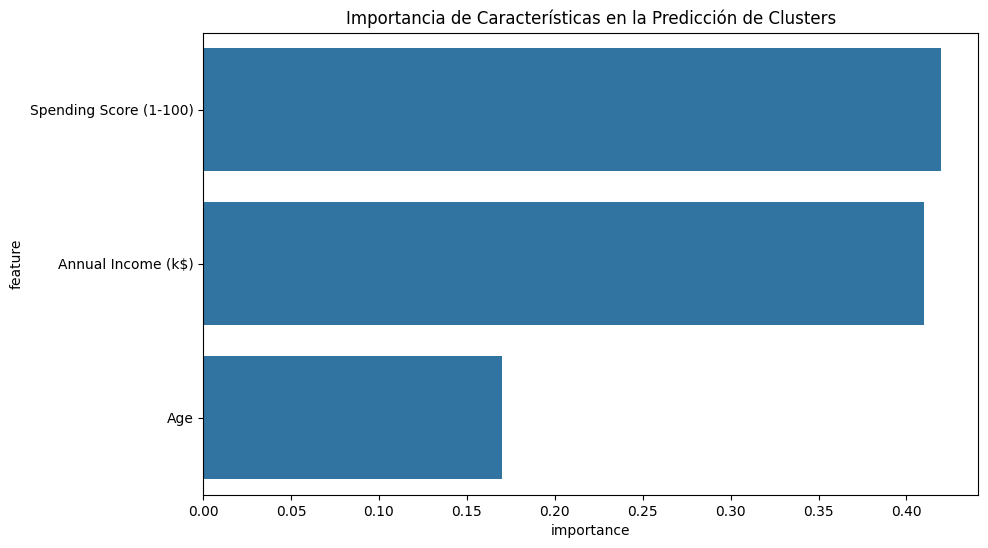

In [ ]:
# Usando el RandomForestClassifier anterior
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Importancia de Características en la Predicción de Clusters')
plt.show()

Predicción de Spending Score


Linear Regression:
CV R² Score: -1.542 (+/- 5.224)
Test R² Score: 0.020
RMSE: 21.990

Random Forest:
CV R² Score: -1.632 (+/- 5.434)
Test R² Score: 0.035
RMSE: 21.814


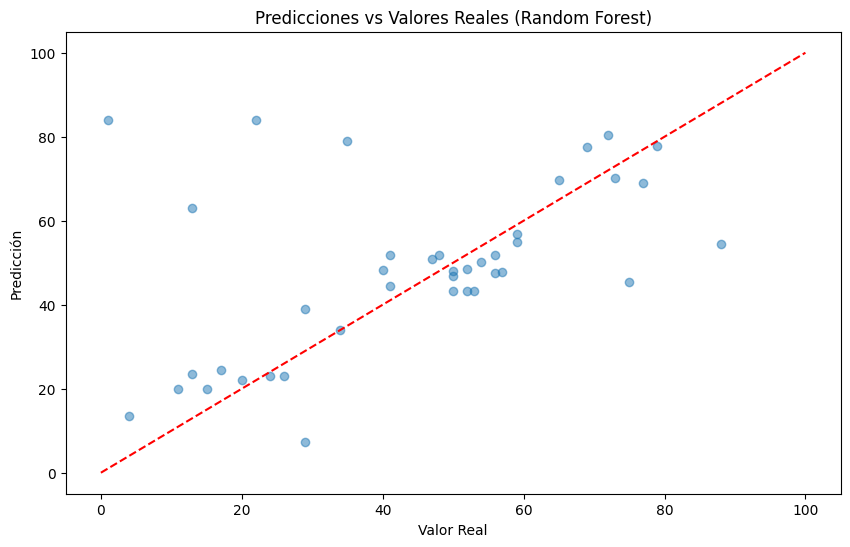


Importancia de características:
              feature  importance
0                 Age    0.506322
1  Annual Income (k$)    0.493678


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np

# Preparar datos
X_spending = df[['Age', 'Annual Income (k$)']]
y_spending = df['Spending Score (1-100)']

# Escalar las características
scaler = StandardScaler()
X_spending_scaled = scaler.fit_transform(X_spending)

# Split datos
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_spending_scaled, y_spending,
                                                            test_size=0.2, random_state=42)

# Probar diferentes modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    # Validación cruzada
    cv_scores = cross_val_score(model, X_spending_scaled, y_spending,
                              cv=5, scoring='r2')

    # Entrenar y evaluar en el conjunto de prueba
    model.fit(X_train_s, y_train_s)
    y_pred_s = model.predict(X_test_s)

    print(f"\n{name}:")
    print(f"CV R² Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    print(f"Test R² Score: {r2_score(y_test_s, y_pred_s):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test_s, y_pred_s)):.3f}")

# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test_s, models['Random Forest'].predict(X_test_s), alpha=0.5)
plt.plot([0, 100], [0, 100], 'r--')  # línea diagonal perfecta
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales (Random Forest)')
plt.show()

# Importancia de características
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X_spending.columns,
    'importance': rf_model.feature_importances_
})
print("\nImportancia de características:")
print(feature_importance.sort_values('importance', ascending=False))